In [1]:
# https://leetcode.com/problems/count-different-palindromic-subsequences/description/

https://www.youtube.com/watch?v=fvYlinirmFg&t=50s


![Screenshot 2024-01-10 at 4.17.08 PM.png](<attachment:Screenshot 2024-01-10 at 4.17.08 PM.png>)
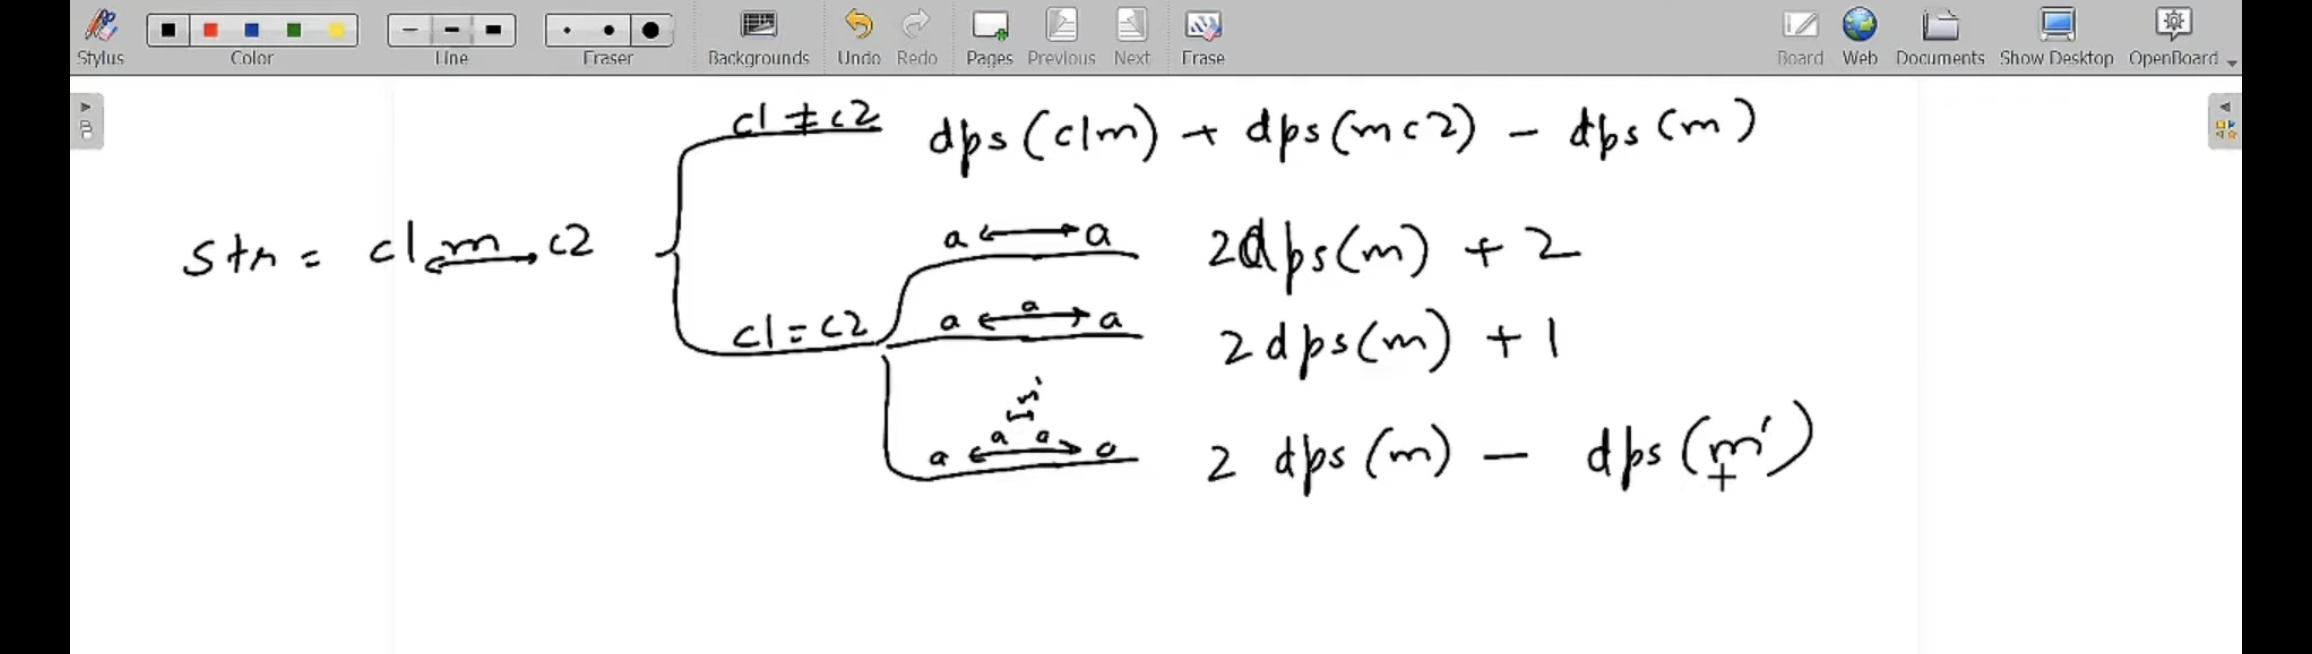

<img src="./../../../../images/WhatsApp Image 2024-01-10 at 4.50.19 PM.jpeg" width="400" >
<br>
<img src="./../../../../images/WhatsApp Image 2024-01-10 at 4.50.20 PM.jpeg" width="400" style="transform: rotate(-90deg);" >

In [2]:
mod = 10**9 + 7

class Solution:
    def countPalindromicSubsequences(self, s: str) -> int:
        n = len(s)
        prev= [-1] * n
        nxt= [-1] * n
        mp = {}
        for i in range(n):
            prev[i] = mp[s[i]] if s[i] in mp else -1
            mp[s[i]] = i
        mp = {}
        for i in range(n-1, -1, -1):
            nxt[i] = mp[s[i]] if s[i] in mp else -1
            mp[s[i]] = i

        def helper(i, j):
            if i == j:
                return 1
            if i > j:
                return 0
            if s[i] == s[j]:
                if prev[j] == i:
                    return 2 * helper(i + 1, j - 1) + 2
                elif nxt[i] == prev[j]:
                    return 2 * helper(i + 1, j - 1) + 1
                else:
                    return 2 * helper(i + 1, j - 1) - helper(nxt[i], prev[j])
            else:
                return helper(i + 1, j) + helper(i, j - 1) - helper(i + 1, j - 1)
        
        return helper(0, n-1) % mod


In [3]:
mod = 10**9 + 7

class Solution:
    def countPalindromicSubsequences(self, s: str) -> int:
        n = len(s)
        prev= [-1] * n
        nxt= [-1] * n
        mp = {}
        for i in range(n):
            prev[i] = mp[s[i]] if s[i] in mp else -1
            mp[s[i]] = i
        mp = {}
        for i in range(n-1, -1, -1):
            nxt[i] = mp[s[i]] if s[i] in mp else -1
            mp[s[i]] = i
        
        dp = [[-1]*n for _ in range(n)]

        def helper(i, j):
            if i == j:
                return 1
            if i > j:
                return 0
            if dp[i][j] != -1:
                return dp[i][j]
            if s[i] == s[j]:
                if prev[j] == i:
                    dp[i][j] = 2 * helper(i + 1, j - 1) + 2
                elif nxt[i] == prev[j]:
                    dp[i][j] = 2 * helper(i + 1, j - 1) + 1
                else:
                    dp[i][j] = 2 * helper(i + 1, j - 1) - helper(nxt[i] + 1, prev[j] - 1)
            else:
                dp[i][j] = helper(i + 1, j) + helper(i, j - 1) - helper(i + 1, j - 1)
            return dp[i][j]
        
        return helper(0, n-1) % mod


In [4]:
s = "bccb"
sol = Solution()
sol.countPalindromicSubsequences(s)

6

In [5]:
s = "abcdabcdabcdabcdabcdabcdabcdabcddcbadcbadcbadcbadcbadcbadcbadcba"
sol = Solution()
sol.countPalindromicSubsequences(s)

104860361